1. [Problem Statement](#section1)<br>
2. [Loading the libraries](#section2)<br>
3. [Data Loading and Description](#section3)<br>
4. [Preprocessing the data](#section4)<br>
5. [Exploratory Data Analysis](#section5)<br>
6. [Training and testing the Model](#section6)<br>
    - 6.1 [Splitting data into training and test datasets](#section601)<br>
7. [Support Vector Machine](#section7)<br>
    - 7.1 [Support Vector Classifier](#section701)<br>
    - 7.2 [Using the Model for Prediction](#section702)<br> 
    - 7.3 [Model evaluation for SVM](#section703)<br>
8. [Conclusion](#section8)

### 1. Problem Statement <a id=section1></a>

Gender Recognition by Voice and Speech Analysis

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range).
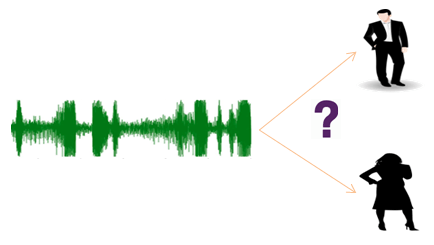

### 2. Loading the Libraries <a id=section2></a>

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC

%matplotlib inline

## 3. Data Loading and Description <a id=section3></a>

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Projects/gender_recognition_by_voice.csv')

In [3]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


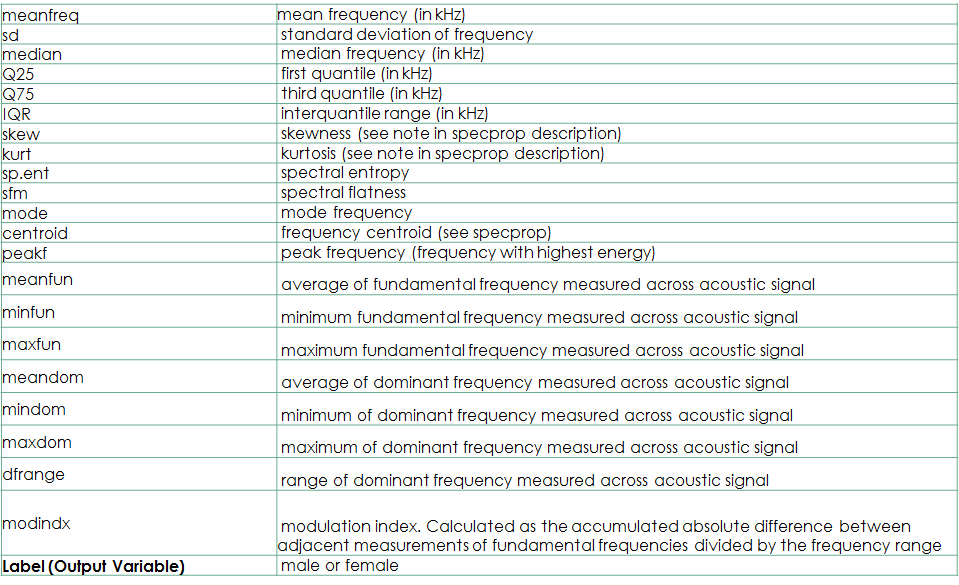

## 4. Preprocessing the data <a id=section4></a>

In [4]:
data.shape

(3168, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [6]:
data.describe(include='all')

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,...,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1584
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,...,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752,NaN
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,...,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454,NaN
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,...,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000,NaN
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,...,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766,NaN
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,...,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357,NaN
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,...,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183,NaN


In [7]:
data.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [8]:
data_features = data.drop(['label'], axis=1)

In [9]:
data_features.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [10]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_before_preprocessing.html

#profile = data.profile_report(title='Pandas Profiling before Data Preprocessing - Gender Voice Recognition')
#profile.to_file(output_file="profiling_before_preprocessing.html")

Some of the major points obtained from Pandas profiling
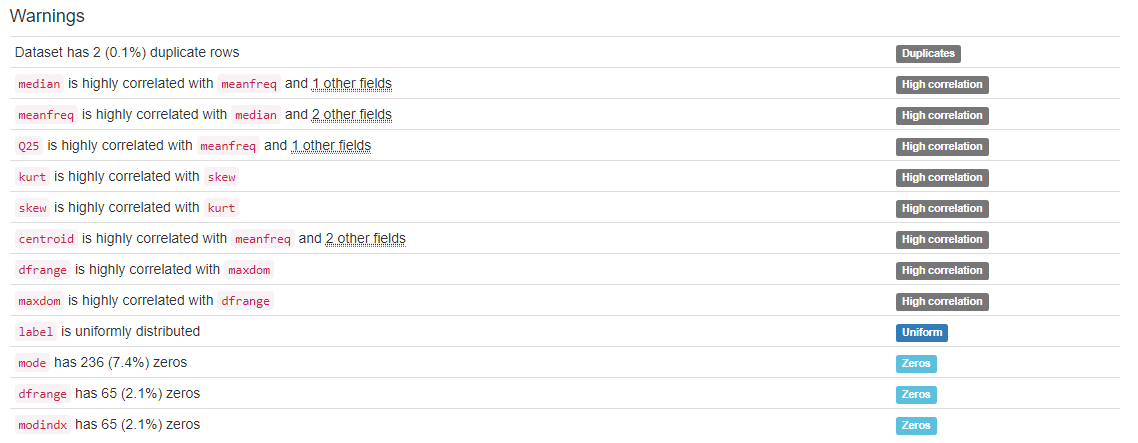

## 5. Exploratory Data Analysis <a id=section5></a>

Class as pie chart:


Text(0, 0.5, '')

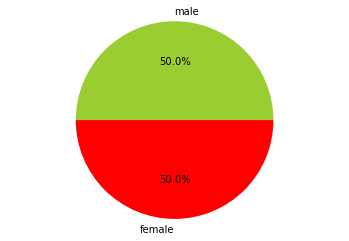

In [11]:
# Check Class variables that has 0 value for Genuine transactions and 1 for Fraud
print("Class as pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(data.label.value_counts(),autopct='%1.1f%%', labels=['male','female'], colors=['yellowgreen','r'])
plt.axis('equal')
plt.ylabel('')

In [12]:
data_features.drop(['IQR'], axis=1, inplace = True) #'IQR' = 'Q75' - 'Q25'

In [13]:
data_features.head()

,meanfreq,sd,median,Q25,Q75,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [14]:
corr = data_features.corr()

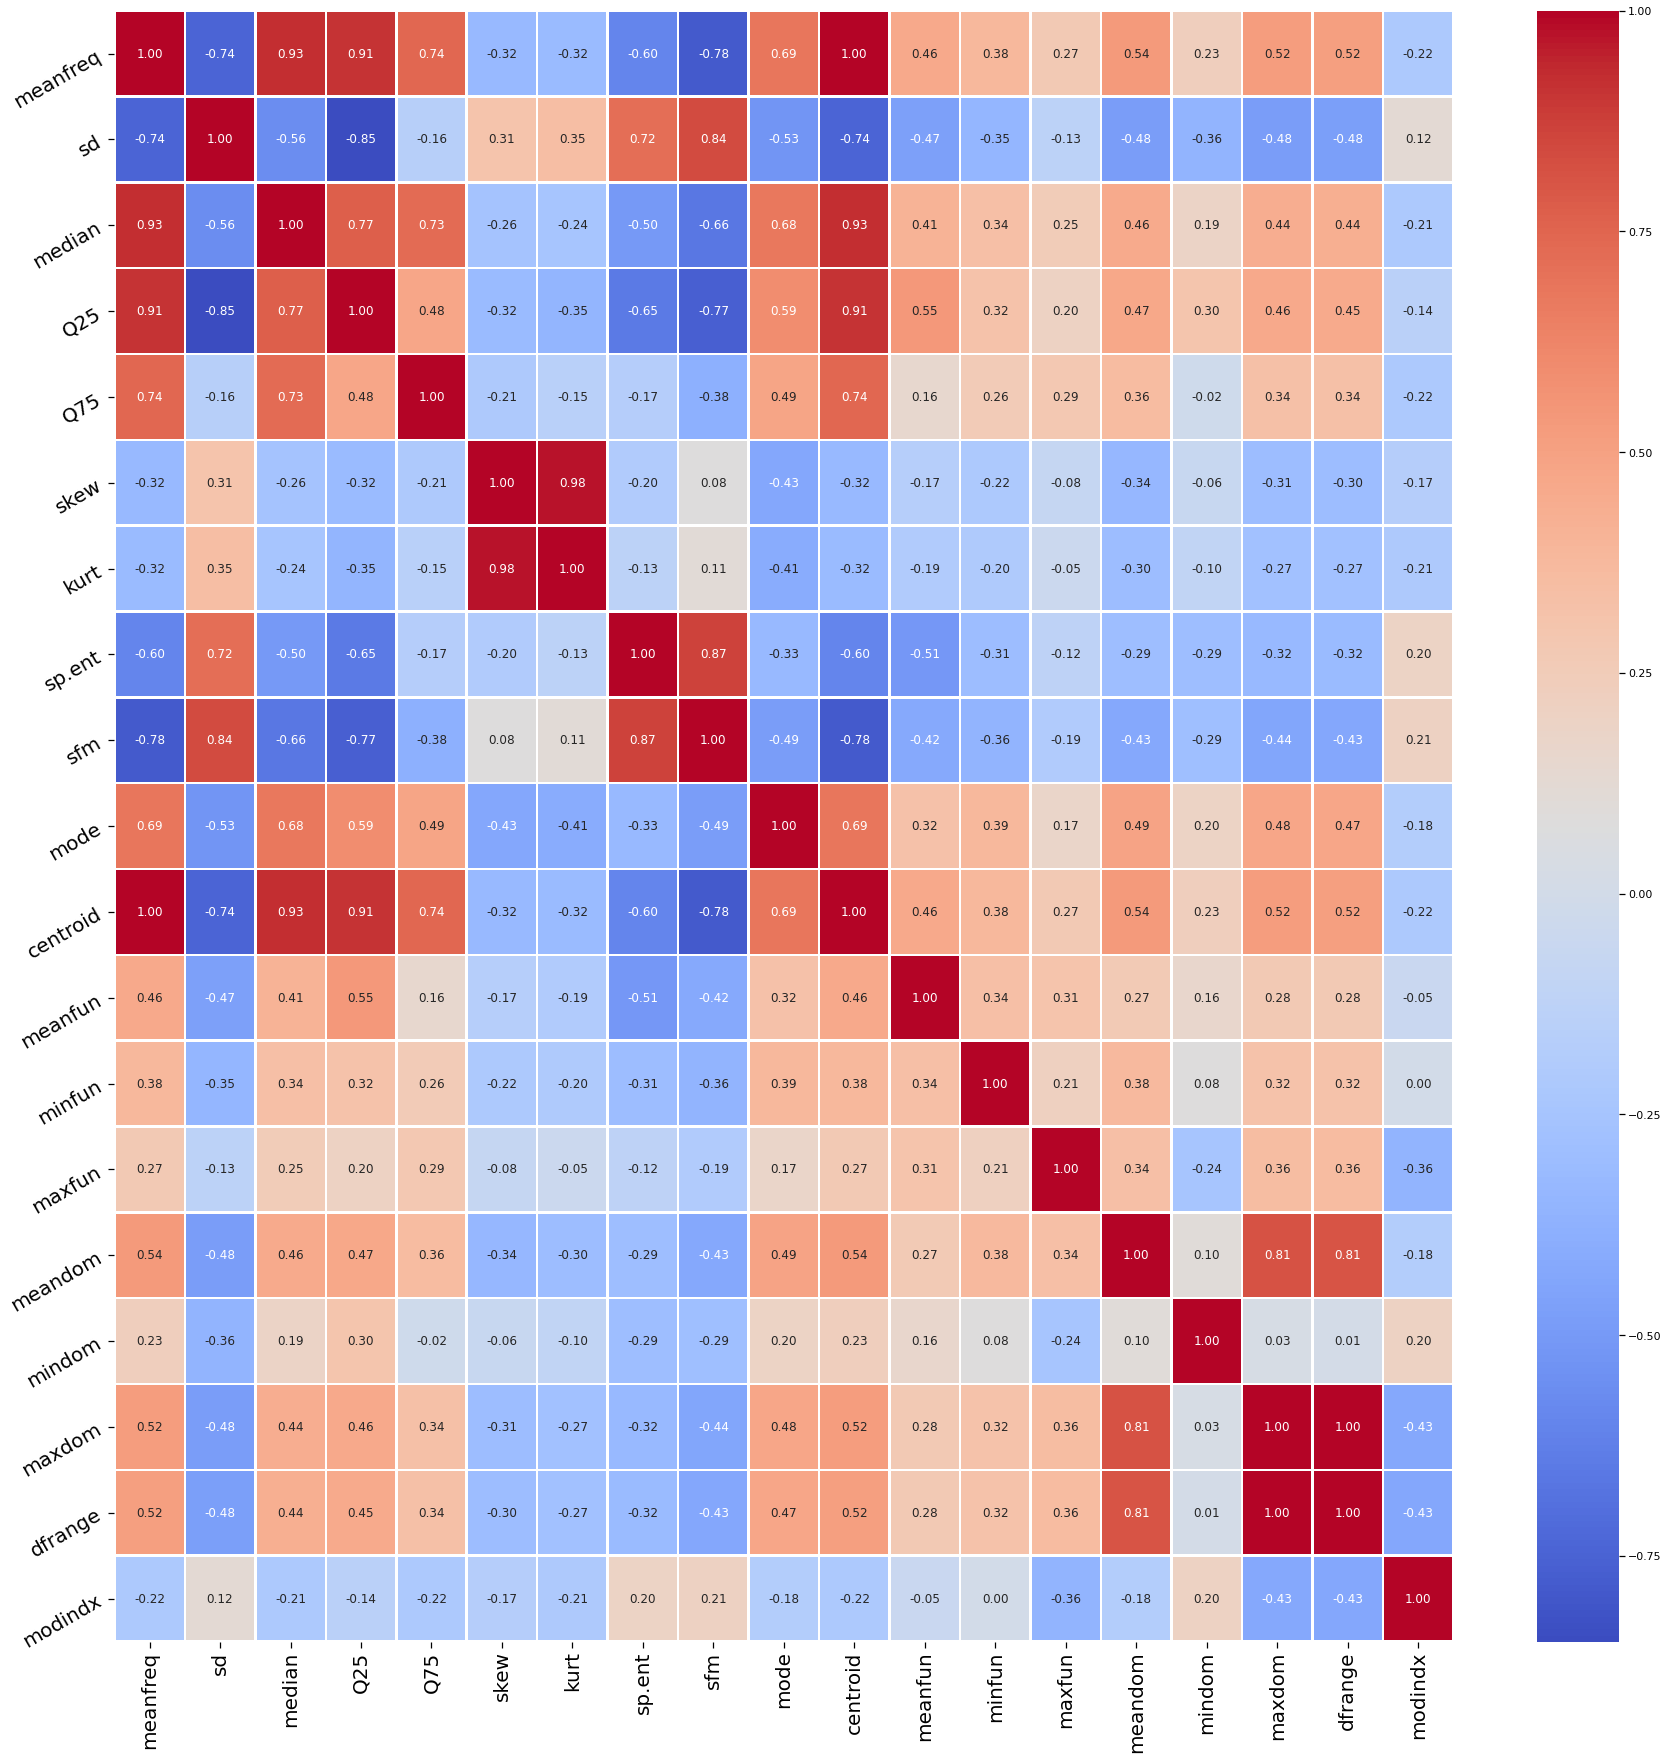

In [15]:
# heatmap of correlation among various attributes

sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.subplots(figsize=(30,30))
p = sns.heatmap(corr, annot=True, lw=1.5, fmt='.2f', cmap='coolwarm')
rotxlabel = p.set_xticklabels(p.get_xticklabels(),fontdict={'fontsize':20}, rotation=90)
rotylabel = p.set_yticklabels(p.get_yticklabels(),fontdict={'fontsize':20}, rotation=30)

* Centroid has 1 correlation with meanfreq, i.e. they have same values
* Centroid is also highly coorelated with median and Q25
* This can be further studied from the distribution plot below.

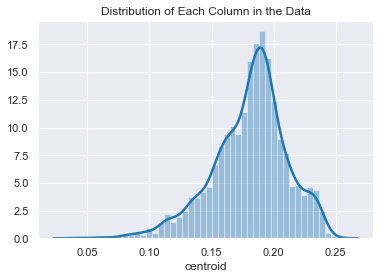

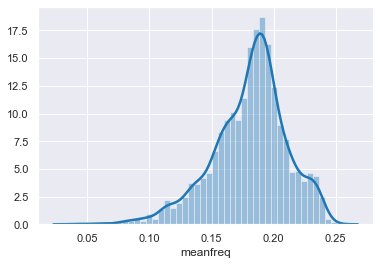

In [16]:
sns.set_style('darkgrid')
plt.title('Distribution of Each Column in the Data')

for i,col in enumerate(['meanfreq','centroid']):
    plt.figure(i)
    sns.distplot(data_features[col])

In [17]:
data_features.drop(['centroid'], axis=1, inplace=True)

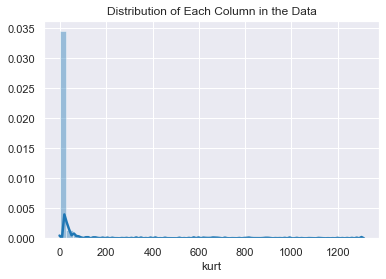

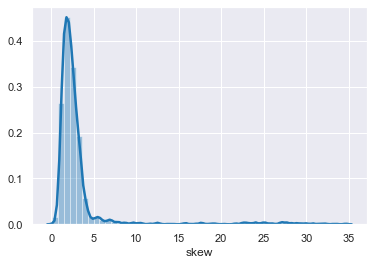

In [18]:
sns.set_style('darkgrid')
plt.title('Distribution of Each Column in the Data')

for i,col in enumerate(['skew','kurt']):
    plt.figure(i)
    sns.distplot(data_features[col])

* skewness is highly correlated with kurtosis

In [19]:
data_features.drop(['kurt'], axis=1, inplace=True)

Text(0.5, 1.0, 'Pair Plot')

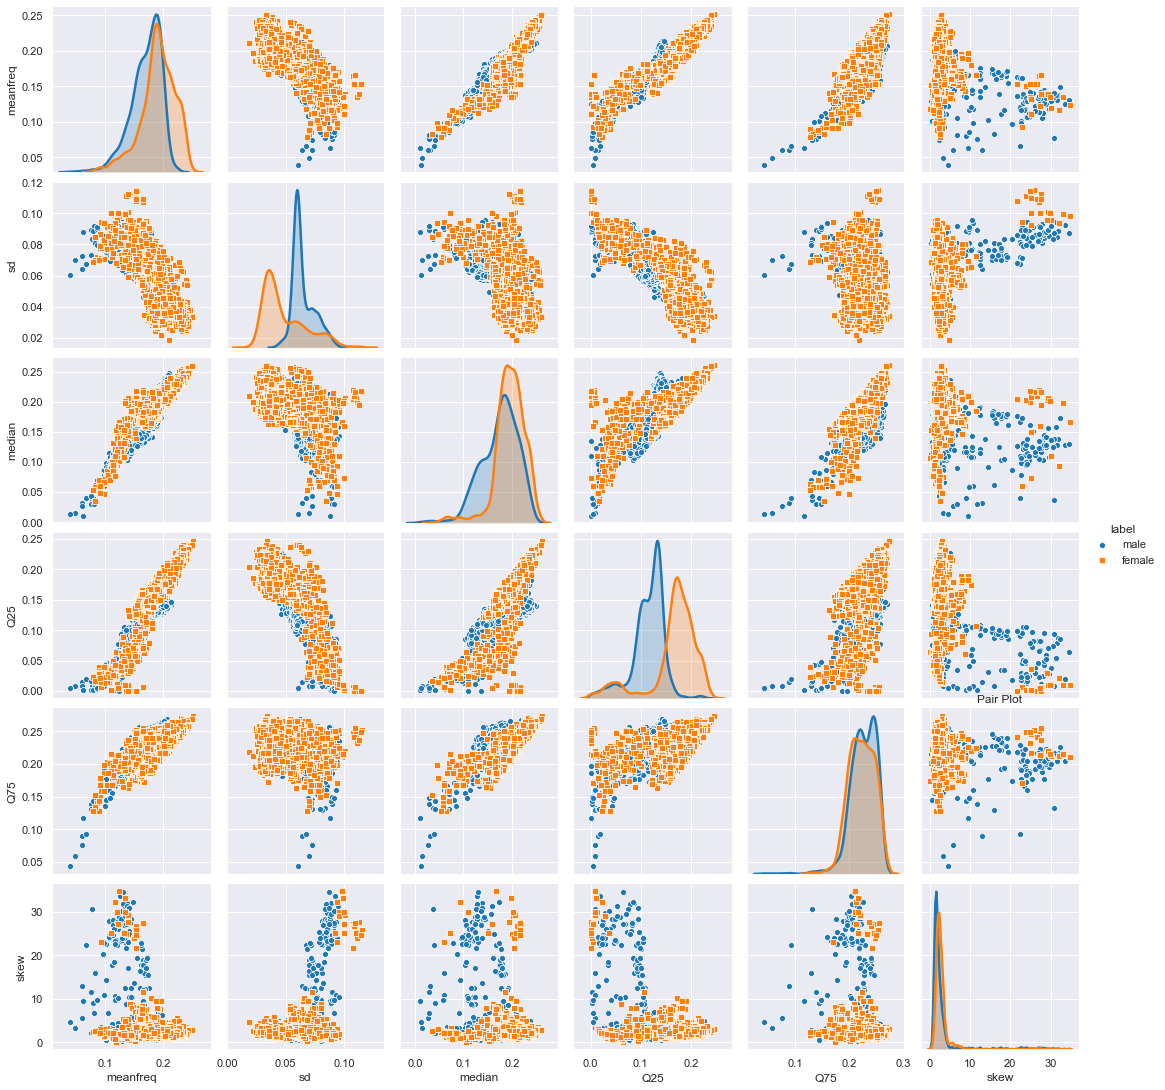

In [20]:
sns.pairplot(data[['meanfreq','sd','median','Q25','Q75','skew','label']], vars=['meanfreq','sd','median','Q25','Q75','skew'] , hue="label", markers=["o", "s"])
plt.title('Pair Plot')


Text(0.5, 1.0, 'Pair Plot')

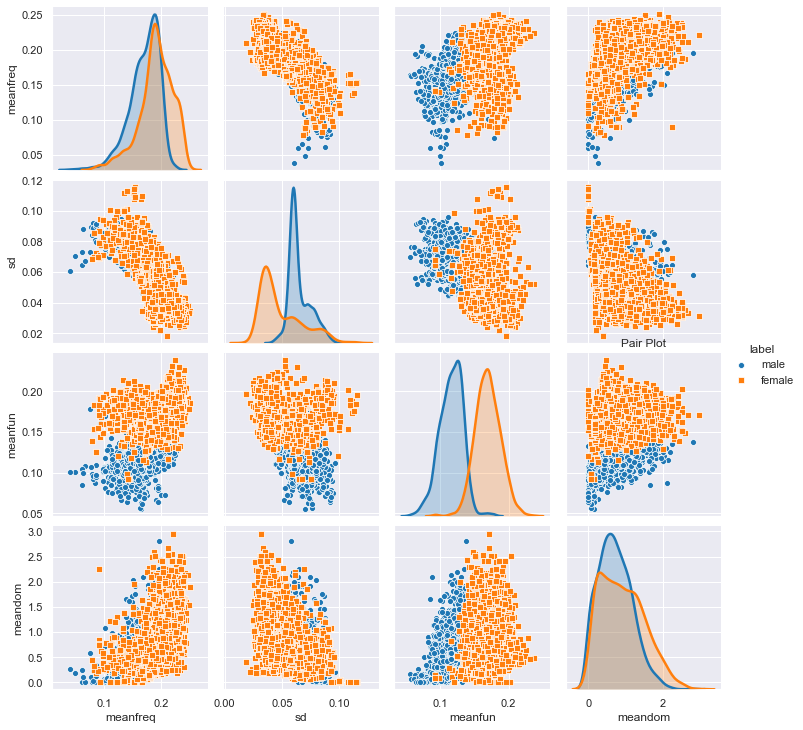

In [21]:
sns.pairplot(data[['meanfreq','sd','meanfun','meandom','label']], vars=['meanfreq','sd','meanfun','meandom'] , hue="label", markers=["o", "s"])
plt.title('Pair Plot')

In [74]:
data_sorted = data.sort_values(axis=0, ascending=False, inplace = False, by=['meanfreq'])

In [93]:
data_sorted.reset_index(inplace=True)

In [111]:
data_sorted.loc[0]['meanfun']

0.185008476152323

In [112]:
for k in np.arange(0,data_sorted.count()[0],1):
    if data_sorted.loc[k]['label'] in ['male']:
        highest_male_fun_freq = data_sorted.loc[k]['meanfun']
print(highest_male_fun_freq)

0.101011490846051


* Mean fundamental frequency of female is more than male
* Female can speak in varying frequency and thus have more distributed standard deviation

In [23]:
y=data['label'].values
y

array(['male', 'male', 'male', ..., 'female', 'female', 'female'],
      dtype=object)

In [24]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_features)
data_features = scaler.transform(data_features)

## 6. Training and Testing the Model <a id=section6></a>

### 6.1 Splitting data into training and test datasets <a id=section601></a>

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_features, y, test_size=0.2,
                                                    random_state=42, stratify=y)

In [26]:
print("train-set size: ", len(y_train),"\ntest-set size: ", len(y_test))

train-set size:  2534 
test-set size:  634


## 7. Support Vector Machine <a id=section7></a>

### 7.1 Support Vector Classifier <a id=section701></a>

In [27]:
#clf = SVC(C=0.8, degree=3, kernel='poly', gamma='scale')
clf = SVC()

In [28]:
clf.fit(X_train, y_train)

SVC()

In [29]:
y_predict_test = clf.predict(X_test)
y_predict_train = clf.predict(X_train)

In [34]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
accuracy_score(y_test,y_predict_test)

0.9842271293375394

Lets use k-fold cross valdiation to identify correct values of C (error weight), gamma and degree and the type of kernel

In [36]:
C_range = list(np.arange(0.1,10,0.1))
acc_score=[]
for c in C_range:
    svc = SVC(kernel = 'linear', C=c)
    scores = cross_val_score(svc, data_features, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.970331030627321, 0.9700155732140718, 0.9693836601046201, 0.9700145749311184, 0.970331030627321, 0.9700155732140718, 0.9696991175178693, 0.9696991175178692, 0.9693836601046201, 0.9696991175178692, 0.9696991175178692, 0.9700145749311183, 0.9687507487122151, 0.9693826618216669, 0.9690662061254642, 0.9690662061254642, 0.9690662061254642, 0.9690662061254642, 0.969698119234916, 0.969698119234916, 0.969698119234916, 0.969698119234916, 0.9690662061254642, 0.9690662061254642, 0.9690662061254642, 0.9693816635387134, 0.9690662061254642, 0.9687507487122151, 0.9687507487122151, 0.9687507487122151, 0.9687507487122151, 0.9687507487122151, 0.9687507487122151, 0.9687507487122151, 0.9684352912989656, 0.9684352912989656, 0.9684352912989656, 0.9684352912989656, 0.9687507487122151, 0.9690662061254642, 0.9690662061254642, 0.9690662061254642, 0.9690662061254642, 0.9690662061254642, 0.9690662061254642, 0.9690662061254642, 0.9690662061254642, 0.9690662061254642, 0.9690662061254642, 0.9690662061254642, 0.969

Text(0, 0.5, 'Cross-Validated Accuracy')

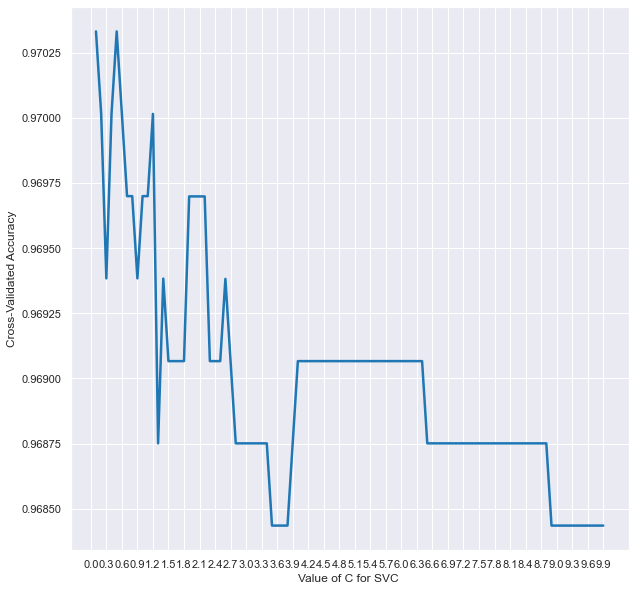

In [39]:
C_values=list(np.arange(0.1,10,0.1))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.figure(figsize=(10,10))
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0.0,10,0.3))
plt.xlabel('Value of C for SVC ')
plt.ylabel('Cross-Validated Accuracy')

For 'Linear' kernel best value of C is 0.1

In [40]:
gamma_range = [0.001, 0.01, 0.1, 1, 10, 100]
acc_score = []
for g in gamma_range:
    svc = SVC(kernel = 'rbf', gamma = g)
    scores = cross_val_score(svc, data_features, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.961806692488919, 0.9681178373198097, 0.9646318332468156, 0.9106107495108414, 0.6029060016771155, 0.49905362776025236]


Text(0, 0.5, 'Cross-Validated Accuracy')

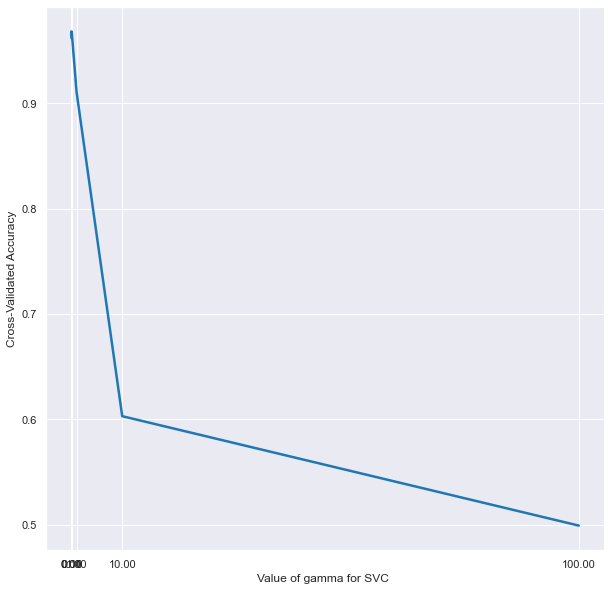

In [43]:
gamma_values=[0.001, 0.01, 0.1, 1, 10, 100]
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.figure(figsize=(10,10))
plt.plot(gamma_values,acc_score)
plt.xticks(gamma_values)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

Accuracy is highest for gamma = 0.01

In [44]:
degree=[2,3,4,5,6]
acc_score=[]
for d in degree:
    svc = SVC(kernel='poly', degree=d)
    scores = cross_val_score(svc, data_features, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)   

[0.8380176097112966, 0.945698398754143, 0.8247783811843629, 0.8689993211675917, 0.772077027512678]


Text(0, 0.5, 'Cross-Validated Accuracy')

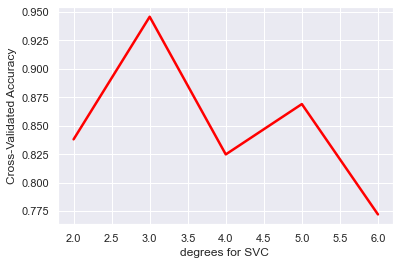

In [45]:
degree=[2,3,4,5,6]

plt.plot(degree,acc_score,color='r')
plt.xlabel('degrees for SVC ')
plt.ylabel('Cross-Validated Accuracy')

Accuracy is highest for thid degree polynomial.

Using Grid search technique to find the best possible model

In [51]:
tuned_parameters = { 'C': (np.arange(0.1,1,0.1)) , 'kernel': ['linear','poly','rbf'],'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]}
# 'C': (np.arange(0.1,1,0.1)) , 'gamma': [0.01,0.02,0.03,0.04,0.05], 'kernel': ['rbf'],
# 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05], 'C':(np.arange(0.1,1,0.1)) , 'kernel':['poly']
#                  }

In [52]:
print(tuned_parameters)

{'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), 'kernel': ['linear', 'poly', 'rbf'], 'degree': [2, 3, 4], 'gamma': [0.01, 0.02, 0.03, 0.04, 0.05]}


In [54]:
from sklearn.model_selection import GridSearchCV

model_svm = GridSearchCV(SVC(), tuned_parameters,cv=10,scoring='accuracy')


In [55]:
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

0.9782997728050793


In [56]:
print(model_svm.best_params_)

{'C': 0.7000000000000001, 'degree': 2, 'gamma': 0.05, 'kernel': 'rbf'}


### 7.2 Using the model for prediction <a id=section702></a>

In [ ]:
y_pred_test = model_svm.predict(X_test)

### 7.3 Model evaluation for SVM <a id=section703></a>

In [57]:
print(accuracy_score(y_pred_test,y_test))

0.9826498422712934


## 8. Conclusion <a id=section8></a>

Support Vector Machines – Classifier is used to predict the label as Male or Female
Following parameters are identified as the best parameters for model prediction:
Kernel: RBF
C weightage: 0.7
Degree: 2
Gamma: 0.05<br>
**Model can predict the output with an accuracy of 98.264%**